In [40]:
import numpy as np
import seaborn as sns
import pandas as pd
import os, glob
import csv
import matplotlib.pyplot as plt
import operator


%matplotlib inline

sns.set(style="white", context="talk")

In [41]:
gpa=pd.read_csv("grades.csv")

In [42]:
""""shows GPA mean and distribution for 2013 Spring Term and grades 
gpa all is the accumulative gpa of the students, gpa 13s is 
the Spring term GPA and the cs 65 is the GPA in that class"""


gpa.describe()

,gpa all,gpa 13s,cs 65
count,30.000000,30.000000,30.000000
mean,3.421533,3.330556,3.622222
std,0.397754,0.798284,0.796224
min,2.400000,1.000000,0.000000
25%,3.257000,3.333333,3.666667
50%,3.490500,3.527778,4.000000
75%,3.698500,3.861111,4.000000
max,3.947000,4.000000,4.000000


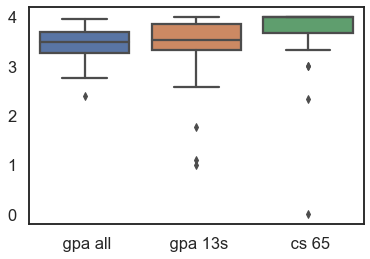

In [43]:
#Boxplot of student's GPA 

boxplot=sns.boxplot(data=gpa)
plt.rcParams["figure.figsize"] = (100,10)

In [44]:
""""Plotting bar graph of overall GPA, first
grouping GPA by a range for cleaner visualization
>2.5 is called twoPointFive
range 2.5-2.8 counter is called twoPointFiveAbove
range 2.8-3.1 counter is called twoPointEightAbove
range 3.1-3.4 threePointOneAbove
range 3.4-3.7 threePointFourAbove
range 3.7 and above threeSevenAndAbove"""

gpaAll=gpa[" gpa all"]

twoPointFive=[]
twoPointFiveAbove=[]
twoPointEightAbove=[]
threePointOneAbove=[]
threePointFourAbove=[]
threeSevenAndAbove=[]

for gpa in gpaAll:
    if gpa<2.5:
        twoPointFive.append(gpa)
    if 2.5<gpa<2.8:
        twoPointFiveAbove.append(gpa)
    if 2.8<gpa<3.1:
        twoPointEightAbove.append(gpa)
    if 3.1<gpa<3.4:
        threePointOneAbove.append(gpa)
    if 3.4<gpa<3.7:
        threePointFourAbove.append(gpa)
    if gpa>3.7:
        threeSevenAndAbove.append(gpa)

storeRange=("<2.5","2.5-2.8","2.8-3.1","3.4-3.7",">3.7")
storeCount=(len(twoPointFive),len(twoPointFiveAbove),len(threePointOneAbove),
           len(threePointFourAbove),len(threeSevenAndAbove))

intervalDefined=([len(twoPointFive),"<2.5"],
[len(twoPointFiveAbove),"2.5-2.8"],
[len(threePointOneAbove),"2.8-3.1"],
[len(threePointFourAbove),"3.4-3.7"],
[len(threeSevenAndAbove),">3.7"])


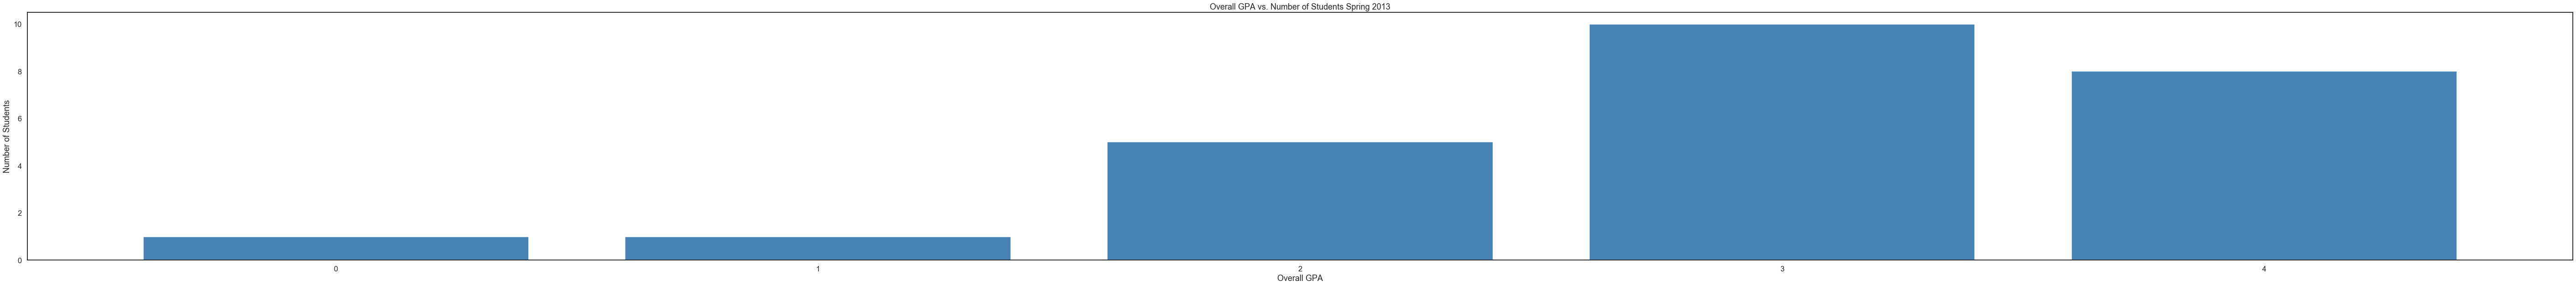

In [45]:
"""Graph displays the distribution of the students given
a GPA range defined above"""

xaxis = [i for i, _ in enumerate(storeRange)]
plt.bar(xaxis, storeCount,color="steelblue")
plt.title("Overall GPA vs. Number of Students Spring 2013")
plt.ylabel('Number of Students')
plt.xlabel("Overall GPA")
plt.show()

In [46]:
""""concatenated two csv files to see the relationships between the 
piazza activity and gpa of the students in the cs 65 class"""""

piazza=pd.read_csv("piazza.csv")
gpa=pd.read_csv("grades.csv")

merged = gpa.merge(piazza, on='uid')
merged.to_csv("combinedGPAPiazza.csv", index=False)

mergedDf=pd.read_csv("combinedGPAPiazza.csv")

'This graph shows the relationship between the students GPA in the '

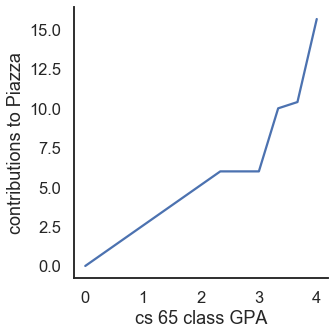

In [49]:
mergedGraph=sns.relplot(x=" cs 65", y="contributions",
            ci=None, kind="line", data=mergedDf);

mergedGraph.set_axis_labels("cs 65 class GPA", "contributions to Piazza");


"""This graph shows the relationship between the students GPA in the 
class and their contributions (number of posts, responses, edits, 
followups,and comments to followups (i.e., everything)) to the class"""